In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# import data
app_df = pd.read_csv("resources/charity_data.csv")
app_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# drop EIN and NAME columns
app_df=app_df.drop(['EIN','NAME'], axis=1)
app_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# look at value_counts for application_type
type_counts=app_df.APPLICATION_TYPE.value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

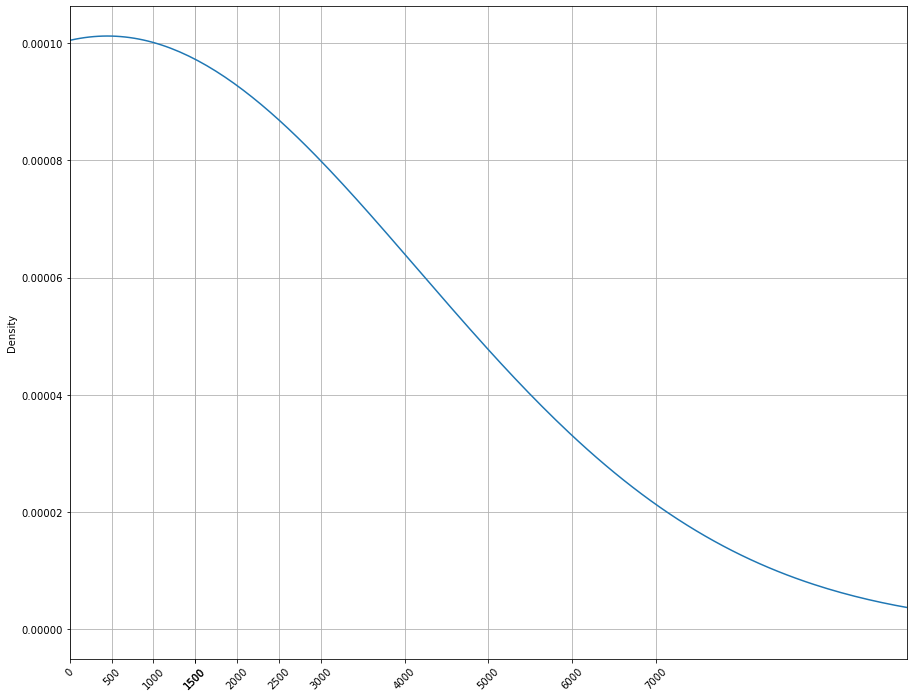

In [4]:
# Visualize the value counts
type_counts.plot.density(figsize=(15,12), grid=True, xticks=[0,500,1000,1500,2000,2500,3000,4000,1500,5000,6000,7000],xlim=(0,10000),rot=45)

In [5]:
# Determine which values to replace if counts are less than ...?
replace_types=list(type_counts[type_counts<1000].index)

# Replace in dataframe
for app in replace_types:
    app_df.APPLICATION_TYPE = app_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
app_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# look at value_counts for application_type
class_counts=app_df.CLASSIFICATION.value_counts()

display(class_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

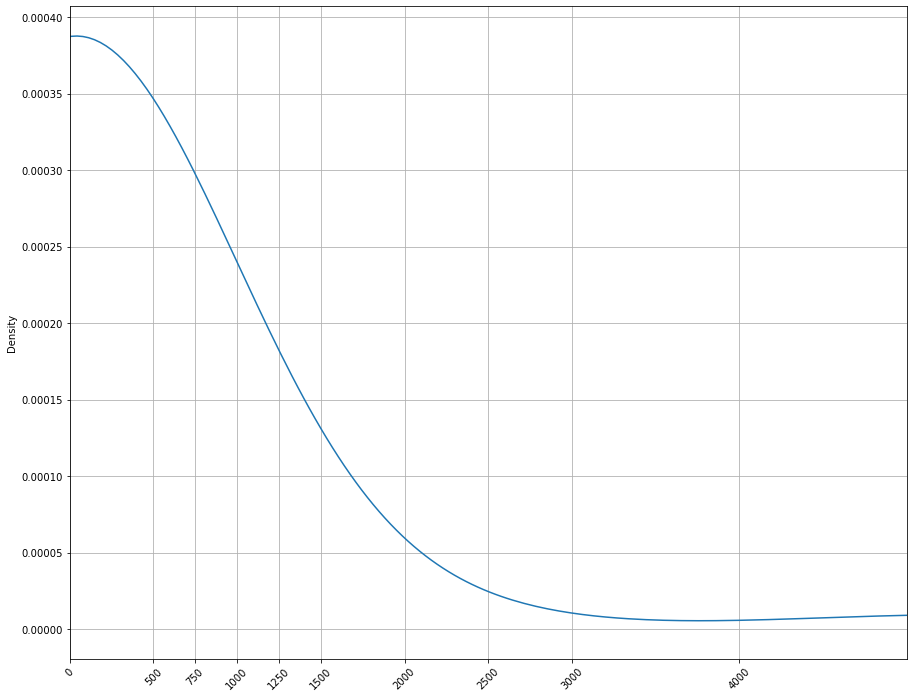

In [7]:
# Visualize the value counts
class_counts.plot.density(figsize=(15,12), grid=True, xticks=[0,500,750,1000,1250,1500,2000,2500,3000,4000],xlim=(0,5000),rot=45)

In [8]:
# Determine which values to replace if counts are less than ..?
replace_class=list(class_counts[class_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    app_df.CLASSIFICATION = app_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable list
app_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()
app_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(app_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Merge one-hot encoded features and drop the originals
app_df = app_df.merge(encode_df,left_index=True, right_index=True)
app_df = app_df.drop(app_cat,1)
app_df.head()

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Remove loan status target from features data
y = app_df.IS_SUCCESSFUL.values
X = app_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 129
hidden_nodes_layer2 = 129
hidden_nodes_layer3 = 43

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 129)               5289      
                                                                 
 dense_1 (Dense)             (None, 129)               16770     
                                                                 
 dense_2 (Dense)             (None, 43)                5590      
                                                                 
 dense_3 (Dense)             (None, 1)                 44        
                                                                 
Total params: 27,693
Trainable params: 27,693
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:.2f}%, Accuracy: {model_accuracy*100:.2f}%")

Epoch 1/100
804/804 [==============================] - 1s 741us/step - loss: 0.5700 - accuracy: 0.7248
Epoch 2/100
804/804 [==============================] - 1s 738us/step - loss: 0.5573 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 731us/step - loss: 0.5552 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 1s 742us/step - loss: 0.5526 - accuracy: 0.7324
Epoch 5/100
764/804 [===========================>..] - ETA: 0s - loss: 0.5520 - accuracy: 0.7335
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5522 - accuracy: 0.7332
Epoch 6/100
804/804 [==============================] - 1s 747us/step - loss: 0.5509 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 1s 753us/step - loss: 0.5495 - accuracy: 0.7340
Epoch 8/100
804/804 [==============================] - 1s 748us/step - loss: 0.5494 - accuracy: 0.7356
Epoch 9/100
804/804 [=================

In [16]:
# Export our model to HDF5 file
nn.save("optimization6.h5")

In [17]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 129
hidden_nodes_layer2 = 129
hidden_nodes_layer3 = 43

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.50.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:.2f}%, Accuracy: {model_accuracy*100:.2f}%")

268/268 - 0s - loss: 0.5671 - accuracy: 0.7252 - 214ms/epoch - 798us/step
Loss: 56.71%, Accuracy: 72.52%


## Add third hidden layer
---

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                3280      
                                                                 
 dense_9 (Dense)             (None, 30)                2430      
                                                                 
 dense_10 (Dense)            (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,031
Trainable params: 6,031
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:2f}, Accuracy: {model_accuracy*100:.2f}")

Epoch 1/50
804/804 [==============================] - 1s 649us/step - loss: 0.5722 - accuracy: 0.7255
Epoch 2/50
804/804 [==============================] - 1s 771us/step - loss: 0.5572 - accuracy: 0.7322
Epoch 3/50
804/804 [==============================] - 1s 658us/step - loss: 0.5546 - accuracy: 0.7315
Epoch 4/50
804/804 [==============================] - 1s 655us/step - loss: 0.5521 - accuracy: 0.7336
Epoch 5/50
781/804 [============================>.] - ETA: 0s - loss: 0.5517 - accuracy: 0.7338
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 666us/step - loss: 0.5515 - accuracy: 0.7336
Epoch 6/50
804/804 [==============================] - 1s 655us/step - loss: 0.5503 - accuracy: 0.7345
Epoch 7/50
804/804 [==============================] - 1s 651us/step - loss: 0.5500 - accuracy: 0.7338
Epoch 8/50
804/804 [==============================] - 1s 653us/step - loss: 0.5489 - accuracy: 0.7339
Epoch 9/50
804/804 [==========================

In [21]:
# Export our model to HDF5 file
nn.save("optimization1_extraLayer.h5")

## Less units per layer
---

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 10

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60)                2460      
                                                                 
 dense_13 (Dense)            (None, 20)                1220      
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn2.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:2f}, Accuracy: {model_accuracy*100:.2f}")

Epoch 1/50
804/804 [==============================] - 1s 658us/step - loss: 0.5726 - accuracy: 0.7200
Epoch 2/50
804/804 [==============================] - 1s 672us/step - loss: 0.5573 - accuracy: 0.7298
Epoch 3/50
804/804 [==============================] - 1s 655us/step - loss: 0.5547 - accuracy: 0.7319
Epoch 4/50
804/804 [==============================] - 1s 651us/step - loss: 0.5529 - accuracy: 0.7320
Epoch 5/50
780/804 [============================>.] - ETA: 0s - loss: 0.5521 - accuracy: 0.7329
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 667us/step - loss: 0.5520 - accuracy: 0.7330
Epoch 6/50
804/804 [==============================] - 1s 650us/step - loss: 0.5512 - accuracy: 0.7339
Epoch 7/50
804/804 [==============================] - 1s 650us/step - loss: 0.5504 - accuracy: 0.7346
Epoch 8/50
804/804 [==============================] - 1s 651us/step - loss: 0.5491 - accuracy: 0.7348
Epoch 9/50
804/804 [==========================

In [24]:
# Export our model to HDF5 file
nn2.save("optimization2_lessUnits.h5")

## Third hidden layer + Increase epochs = 100
---

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                3280      
                                                                 
 dense_17 (Dense)            (None, 30)                2430      
                                                                 
 dense_18 (Dense)            (None, 10)                310       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,031
Trainable params: 6,031
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:.2f}%, Accuracy: {model_accuracy*100:.2f}%")

Epoch 1/100
804/804 [==============================] - 1s 646us/step - loss: 0.5719 - accuracy: 0.7205
Epoch 2/100
804/804 [==============================] - 1s 650us/step - loss: 0.5567 - accuracy: 0.7313
Epoch 3/100
804/804 [==============================] - 1s 643us/step - loss: 0.5535 - accuracy: 0.7324
Epoch 4/100
804/804 [==============================] - 1s 648us/step - loss: 0.5527 - accuracy: 0.7332
Epoch 5/100
790/804 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7329
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 653us/step - loss: 0.5517 - accuracy: 0.7337
Epoch 6/100
804/804 [==============================] - 1s 645us/step - loss: 0.5507 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 1s 645us/step - loss: 0.5496 - accuracy: 0.7351
Epoch 8/100
804/804 [==============================] - 1s 645us/step - loss: 0.5490 - accuracy: 0.7352
Epoch 9/100
804/804 [=================

In [27]:
# Export our model to HDF5 file
nn.save("optimization3_moreEpochs.h5")